In [15]:
#imports 

from sklearn.manifold import TSNE

# Custom csv processor for importing data from csv
import utility.csv_process as reader

# Numpy for matrix manipulation
import numpy as np

# For 2d graphing
from matplotlib import pyplot as plt

# For 3d graphing
from mpl_toolkits.mplot3d import Axes3D

# For building paths
from os import path


In [16]:
#read csvs into np arrays

rw_1 = np.array(reader.cont_read(path.join('data', 'log_gait_1_RW.csv')), dtype = 'float64')
vr_1 = np.array(reader.cont_read(path.join('data', 'log_gait_1_VR.csv')), dtype = 'float64')
rw_2 = np.array(reader.cont_read(path.join('data', 'log_gait_2_RW.csv')), dtype = 'float64')
vr_2 = np.array(reader.cont_read(path.join('data', 'log_gait_2_VR.csv')), dtype = 'float64')


In [17]:
#get the shapes of the separate datasets

print('rw_1:', rw_1.shape, 'vr_1:', vr_1.shape, 'rw_2:', rw_2.shape, 'vr_2:', vr_2.shape,)

rw_1: (2559, 104) vr_1: (3934, 104) rw_2: (2258, 104) vr_2: (2607, 104)


In [18]:
#round the arrays
rw_1_rounded = np.around(rw_1, decimals = 15)
vr_1_rounded = np.around(vr_1, decimals = 15)
rw_2_rounded = np.around(rw_2, decimals = 15)
vr_2_rounded = np.around(vr_2, decimals = 15)


In [19]:
#do the projections

proj_rw_1 = TSNE(random_state=1).fit_transform(rw_1_rounded)
proj_vr_1 = TSNE(random_state=1).fit_transform(vr_1_rounded)
proj_rw_2 = TSNE(random_state=1).fit_transform(rw_2_rounded)
proj_vr_2 = TSNE(random_state=1).fit_transform(vr_2_rounded)


In [20]:
#get the resulting dimensions

print('rw_1: ', proj_rw_1.shape, 'vr_1: ', proj_vr_1.shape, 'rw_2: ', proj_rw_2.shape, 'vr_2: ', proj_vr_2.shape)

rw_1:  (2559, 2) vr_1:  (3934, 2) rw_2:  (2258, 2) vr_2:  (2607, 2)


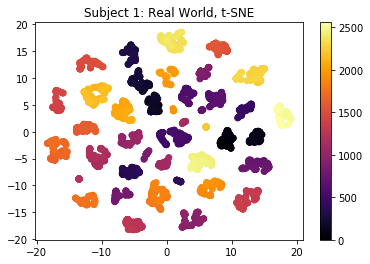

In [21]:
proj_rw_1_x = proj_rw_1[:, 0]
proj_rw_1_y = proj_rw_1[:, 1]
proj_rw_1_t = np.arange(len(proj_rw_1_x))
plt.scatter(proj_rw_1_x, proj_rw_1_y, c=proj_rw_1_t, cmap = "inferno")
plt.colorbar()
plt.title("Subject 1: Real World, t-SNE")
plt.show()

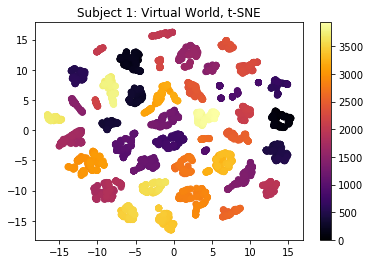

In [22]:
proj_vr_1_x = proj_vr_1[:, 0]
proj_vr_1_y = proj_vr_1[:, 1]
proj_vr_1_t = np.arange(len(proj_vr_1_x))
plt.scatter(proj_vr_1_x, proj_vr_1_y, c=proj_vr_1_t, cmap = "inferno")
plt.colorbar()
plt.title("Subject 1: Virtual World, t-SNE")
plt.show()

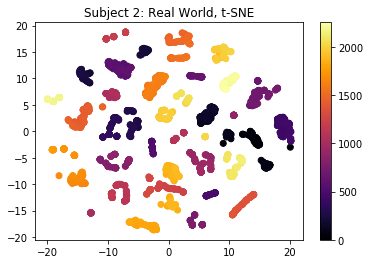

In [23]:
proj_rw_2_x = proj_rw_2[:, 0]
proj_rw_2_y = proj_rw_2[:, 1]
proj_rw_2_t = np.arange(len(proj_rw_2_x))
plt.scatter(proj_rw_2_x, proj_rw_2_y, c=proj_rw_2_t, cmap = "inferno")
plt.colorbar()
plt.title("Subject 2: Real World, t-SNE")
plt.show()

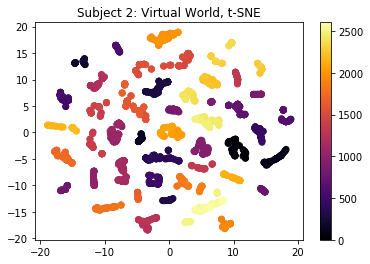

In [24]:
proj_vr_2_x = proj_vr_2[:, 0]
proj_vr_2_y = proj_vr_2[:, 1]
proj_vr_2_t = np.arange(len(proj_vr_2_x))
plt.scatter(proj_vr_2_x, proj_vr_2_y, c=proj_vr_2_t, cmap = "inferno")
plt.colorbar()
plt.title("Subject 2: Virtual World, t-SNE")
plt.show()

In [25]:
#stack our datasets: 

data = np.vstack((rw_1_rounded, vr_1_rounded, rw_2_rounded, vr_2_rounded))
data.shape

(11358, 104)

In [26]:
proj_data = TSNE(random_state=1).fit_transform(data)

In [27]:
rw_1_stacked = proj_data[0:len(rw_1_rounded)]
vr_1_stacked = proj_data[0+len(rw_1_rounded):len(rw_1_rounded)+len(vr_1_rounded)]
rw_2_stacked = proj_data[0+len(rw_1_rounded)+len(vr_1_rounded):len(rw_1_rounded)+len(vr_1_rounded)+len(rw_2_rounded)]
vr_2_stacked = proj_data[0+len(rw_1_rounded)+len(vr_1_rounded)+len(vr_2_rounded):len(rw_1_rounded)+len(vr_1_rounded)+len(rw_2_rounded)+len(vr_2_rounded)]
print('rw_1_stacked', rw_1_stacked.shape, 'vr_1_stacked', vr_1_stacked.shape, 'rw_2_stacked', rw_2_stacked.shape, 'vr_2_stacked', vr_2_stacked.shape)

rw_1_stacked (2559, 2) vr_1_stacked (3934, 2) rw_2_stacked (2258, 2) vr_2_stacked (2258, 2)


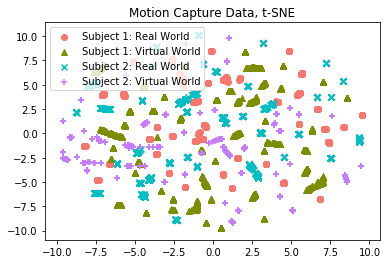

In [30]:
#Make  the 2d plot for graphing:

fig = plt.figure()
ax = fig.add_subplot(111)

#Split x and y

rw_1_stacked_x = rw_1_stacked[: ,0] 
rw_1_stacked_y = rw_1_stacked[: ,1] 
vr_1_stacked_x = vr_1_stacked[: ,0] 
vr_1_stacked_y = vr_1_stacked[: ,1] 
rw_2_stacked_x = rw_2_stacked[: ,0] 
rw_2_stacked_y = rw_2_stacked[: ,1] 
vr_2_stacked_x = vr_2_stacked[: ,0] 
vr_2_stacked_y = vr_2_stacked[: ,1] 




#graph
ax.scatter(rw_1_stacked_x, rw_1_stacked_y, c='#F8766D', marker = "o", label = 'Subject 1: Real World')
ax.scatter(vr_1_stacked_x, vr_1_stacked_y, c='#7C8E00', marker = "^", label = 'Subject 1: Virtual World')
ax.scatter(rw_2_stacked_x, rw_2_stacked_y, c='#00BFC4', marker = "x", label = 'Subject 2: Real World')
ax.scatter(vr_2_stacked_x, vr_2_stacked_y, c='#C77CFF', marker = "+", label = 'Subject 2: Virtual World')


plt.legend(loc = 'best');
plt.title('Motion Capture Data, t-SNE')
plt.show()